In [ ]:
!pip install ultralytics onnx onnx-tf tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
model_path = '/content/drive/MyDrive/yolo_models_sil/yolomodelmeyve.pt'


In [13]:
!pip install ultralytics

from ultralytics import YOLO

model = YOLO(model_path)  # Modeli yükle


In [14]:
model.export(format='tflite',nms=True)


Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,963 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolo_models_sil/yolomodelmeyve.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.51...
ONNX: export success ✅ 5.9s, saved as '/content/drive/MyDrive/yolo_models_sil/yolomodelmeyve.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
Saved artifact at '/content/drive/MyDrive/yolo_models_sil/yolomodelmeyve_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 300, 6), dtype=tf.float32, name=None)
Captures:
  13

'/content/drive/MyDrive/yolo_models_sil/yolomodelmeyve_saved_model/yolomodelmeyve_float32.tflite'

In [8]:
!pip install tflite-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.7 MB/s eta 0:00:00


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/drive/MyDrive/yolo_models/yolomodelmeyve_float32.tflite for TensorFlow Lite inference...

image 1/1 /content/drive/MyDrive/yolo_models/elma.png: 640x640 1 elma, 262.6ms
Speed: 5.0ms preprocess, 262.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Tespit sayısı: 1


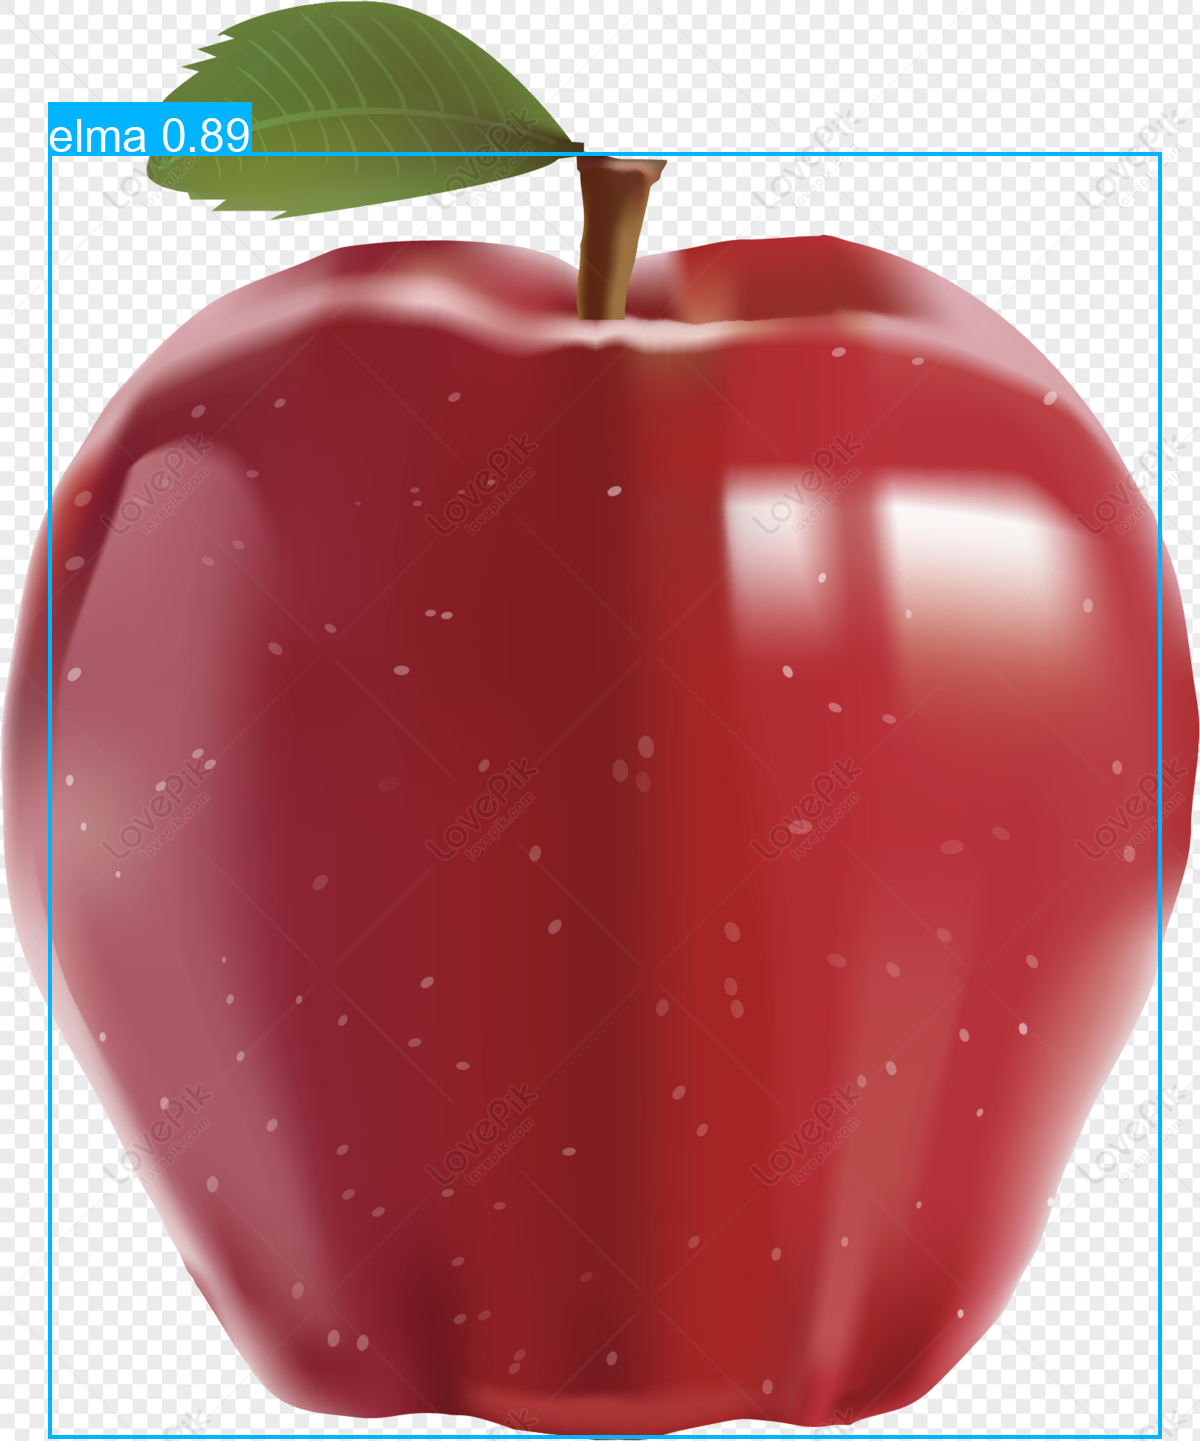

In [ ]:
from google.colab import drive
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# 1) Drive’ı bağla (gerekirse force_remount=True)
drive.mount('/content/drive', force_remount=True)

# 2) TFLite modelini yükle
model = YOLO('/content/drive/MyDrive/yolo_models/yolomodelmeyve_float32.tflite')

# 3) Detect yap; conf eşiğini düşük tutalım
results = model.predict(
    source='/content/drive/MyDrive/yolo_models/elma.png',
    task='detect',
    conf=0.1,    # güven eşiği
    iou=0.3      # NMS eşiği
)

# 4) İlk sonucu al
res = results[0]

# 5) Kaç tespit var kontrol et
print("Tespit sayısı:", len(res.boxes))

# 6) Kutuları çiz (plot) ve göster
annotated = res.plot()       # res.orig_img üzerine çizim yapar ve BGR array döner
cv2_imshow(annotated)        # inline gösterim
